<a href="https://colab.research.google.com/github/le7nik/project/blob/main/Feature_Selection_%22HW_for_lessons_04_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Скачать датасет о качестве КРАСНОГО вина по ссылке.
https://archive.ics.uci.edu/ml/datasets/wine+quality

Источник данных: http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip
или https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import requests,zipfile,io
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
r = requests.get('http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.namelist()

['winequality/winequality-names.txt',
 'winequality/winequality-names.txt.bak',
 'winequality/winequality-red.csv',
 'winequality/winequality-white.csv']

In [ ]:
df = pd.read_csv(z.open('winequality/winequality-red.csv'), sep = ';')
df.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
732,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5
799,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,6
1262,9.8,0.450,0.38,2.5,0.081,34.0,66.0,0.99726,3.15,0.58,9.8,5
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2,4
202,6.8,0.500,0.11,1.5,0.075,16.0,49.0,0.99545,3.36,0.79,9.5,5
842,10.6,0.500,0.45,2.6,0.119,34.0,68.0,0.99708,3.23,0.72,10.9,6
252,11.1,0.350,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,5
911,9.1,0.280,0.46,9.0,0.114,3.0,9.0,0.99901,3.18,0.60,10.9,6
424,7.7,0.960,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5
1310,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5


In [ ]:
df_train = df

In [ ]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. На основе переменной quality с оценками вина создать новую переменную good:
если quality > 5, то 1, иначе 0.

In [ ]:
df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
df.shape

(1599, 13)

In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# Делю на две части
x = df.drop("good", 1)
y = df["good"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Делю вторую выборку
x1 = df_train.drop("quality", 1)
y2 = df_train["quality"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


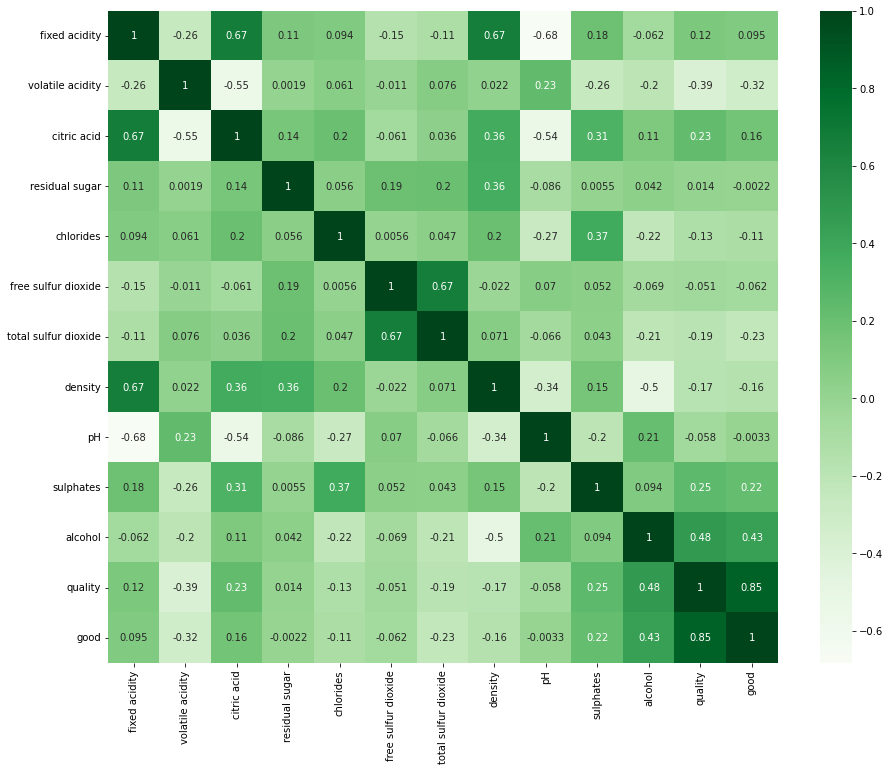

In [ ]:
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Greens")
plt.show()

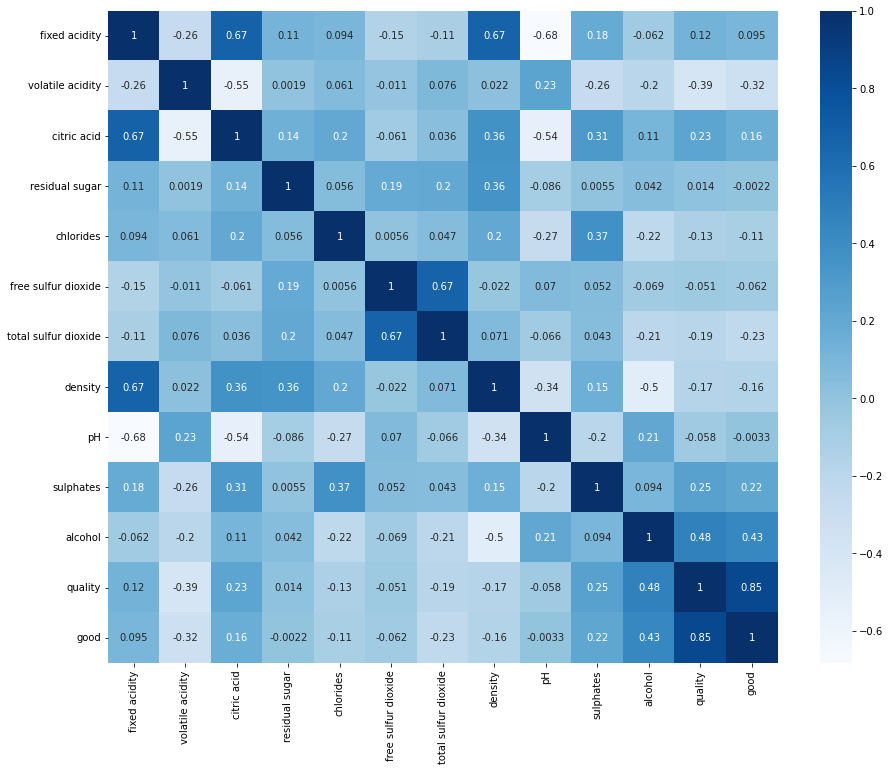

In [ ]:
plt.figure(figsize=(15,12))
cor_1 = df_train.corr()
sns.heatmap(cor_1, annot=True, cmap="Blues")
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["good"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
alcohol                 0.434751
quality                 0.848279
good                    1.000000
Name: good, dtype: float64

In [ ]:
#Correlation with output variable
cor_target = abs(cor_1["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

volatile acidity    0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
good                0.848279
Name: quality, dtype: float64

**Следующий вариант отбора признаков**

---



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y2, test_size = 0.2, random_state=5)

In [ ]:
#     Pipeline – в помощь для кросс-валидации, поможет избежать утечки данных.
#     RepeatedStratifiedKFold – для многократной k-блочной кросс-валидации. 
#     crossvalscore – для скоринга кросс-валидации.
#     GradientBoostingClassifier – оценщик, который мы будем использовать.
#     Numpy – для вычисления среднего всех оценок.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
# import numpy as np - уже импортировал ранее
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# создаем экземпляр класса RFE с указанием оценщика и количества признаков, которые будут отобраны. Выберу 5:
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)

In [ ]:
# Cоздаем экземпляр модели, которую буду использовать
model = GradientBoostingClassifier()

In [ ]:
# Bспользуем Pipeline для преобразования данных. В Pipeline указываю rfe для шага отбора признаков и модель, которая будет использоваться на следующем шаге. 
# Затем задаем RepeatedStratifiedKFold с 10 сплитами и 5 повторениями. 
# Многократная k-блочная кросс-валидация гарантирует, что количество сэмплов каждого класса будет сбалансированным в каждом блоке. 
# RepeatedStratifiedKFold использует многократную k-блочную кросс-валидацию заданное количество раз с различной рандомизацией на каждом повторении.
pipe = Pipeline([("Feature Selection", rfe), ("Model", model)])
cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, x_train, y_train, scoring= "accuracy", cv=cv, n_jobs=-1)
np.mean(n_scores)

0.8223666787047068

In [ ]:
# использование пайплайна на наборе данных.
pipe.fit(x_train, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=5)),
                ('Model', GradientBoostingClassifier())])

In [ ]:
# Проверяем support и ранжирование. Support указывает на то был выбран признак или нет, поместил в датафрейм и получаем результат
pd.DataFrame(rfe.support_,index=x.columns,columns=["Rank"])

,Rank
fixed acidity,False
volatile acidity,True
citric acid,True
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
density,False
pH,False
sulphates,True


In [ ]:
# Смотрим ранжирование
rf_df = pd.DataFrame(rfe.ranking_,index = x.columns,columns=["Rank"]).sort_values(by="Rank", ascending=True)
rf_df.head()

,Rank
volatile acidity,1
citric acid,1
sulphates,1
alcohol,1
quality,1


3. Исследовать, какие химические характеристики вина влияют на то, окажется оно
хорошим или плохим, с применением не менее 5 диаграмм из урока.

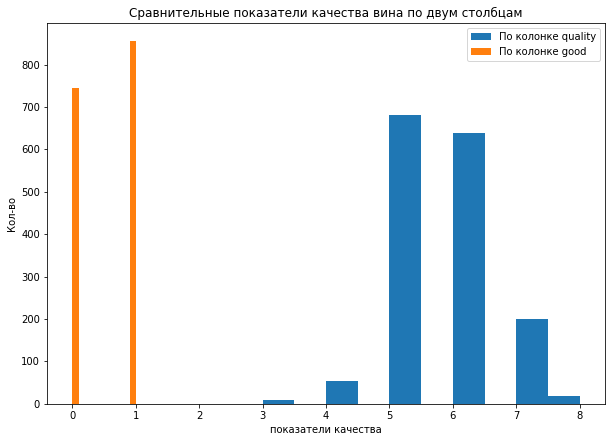

In [ ]:
plt.figure(figsize = (10,7))

plt.hist(df['quality'], label = "По колонке quality")
plt.hist(df['good'], label = "По колонке good")
plt.title('Сравнительные показатели качества вина по двум столбцам')
plt.xlabel('показатели качества')
plt.ylabel('Кол-во')
plt.legend()

plt.show()

In [ ]:
df.loc[df['quality'] == 8].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8,1
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8,1
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,1
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8,1
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,1


In [ ]:
data1 = df.query('good == 0').groupby('quality')['fixed acidity'].agg(count = 'count').reset_index().sort_values(by = 'quality')
data2 = df.query('good == 1').groupby('quality')['fixed acidity'].agg(count = 'count').reset_index().sort_values(by = 'quality')
data1.head()

,quality,count
0,3,10
1,4,53
2,5,681


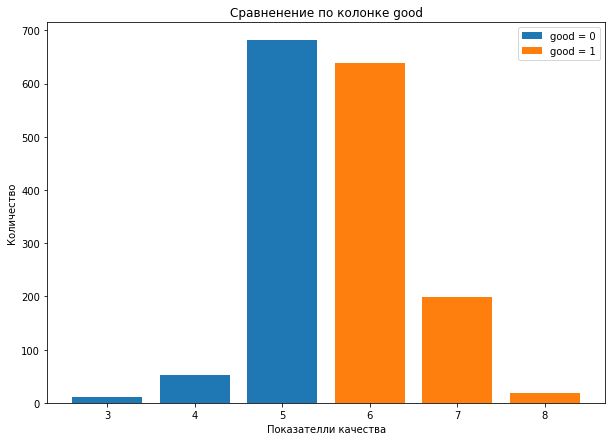

In [ ]:
# Строим линейный график 

plt.figure(figsize = (10,7))

plt.bar(data1['quality'], data1['count'])
plt.bar(data2['quality'], data2['count'])

plt.title('Сравненение по колонке good')
plt.xlabel('Показателли качества')
plt.ylabel('Количество')
plt.legend(['good = 0','good = 1'])

plt.show()

In [ ]:
data = df.groupby('quality')['fixed acidity'].agg(count = 'count').reset_index().sort_values(by = 'quality')
data1 = df.groupby('quality')['volatile acidity'].agg(count = 'count').reset_index().sort_values(by = 'quality')
data2 = df.groupby('quality')['fixed acidity'].count()
data.head()
data1.head()
data2.head()

quality
3     10
4     53
5    681
6    638
7    199
Name: fixed acidity, dtype: int64

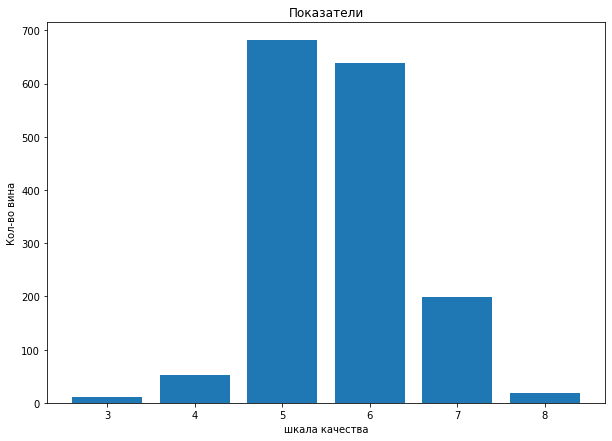

In [ ]:
# Создаем линейный график

plt.figure(figsize = (10,7))

plt.bar(data['quality'], data['count'])
# plt.plot(data_1['quality'], data_1['count'])
plt.title('Показатели')
plt.xlabel('шкала качества')
plt.ylabel('Кол-во вина')

plt.show()

In [ ]:
data = df['quality'].value_counts()
data.head()

5    681
6    638
7    199
4     53
8     18
Name: quality, dtype: int64

In [ ]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


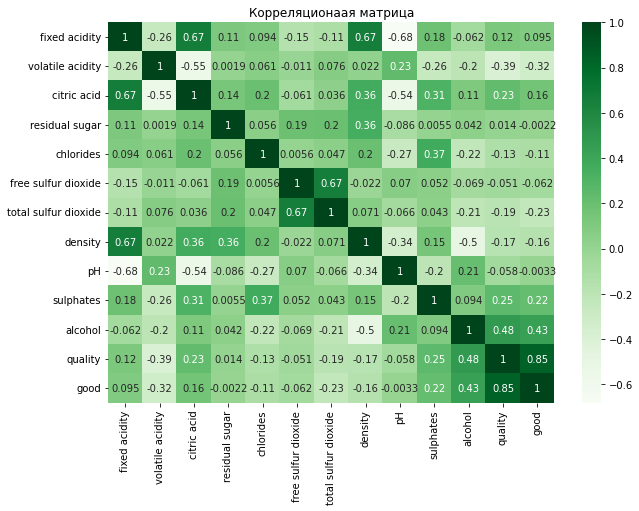

In [ ]:
# Здесь как раз в иден компонент
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = "Greens", annot = True)
plt.title('Корреляционаая матрица')
plt.show()

In [ ]:
data = df[['free sulfur dioxide','chlorides','sulphates']]
data.head()

,free sulfur dioxide,chlorides,sulphates
0,11.0,0.076,0.56
1,25.0,0.098,0.68
2,15.0,0.092,0.65
3,17.0,0.075,0.58
4,11.0,0.076,0.56


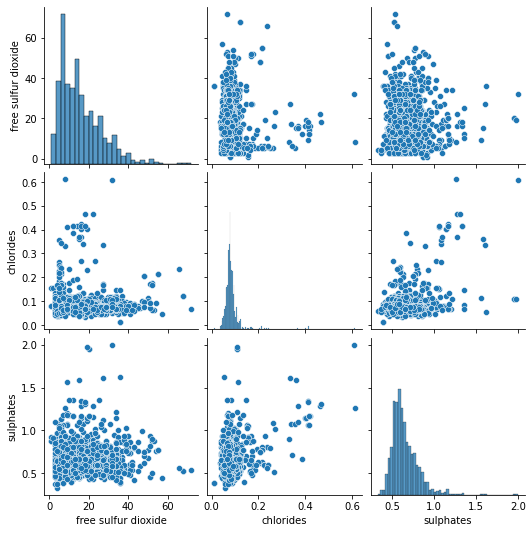

In [ ]:
sns.pairplot(data)

Выделенны три химических характеристики, наличие которых по моему мнению определяют качество вина.